# Micro-Credit Defaulter ML Model

# Problem statement

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations.
MFS becomes very useful when targeting especially the unbanked poor families living in remote areas
with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, 
Agricultural Loans, Individual Business Loans and so on. 

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding
loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications
network provider. They have launched various products and have developed its business and organization 
based on the budget operator model, offering better products at Lower Prices to all value conscious customers 
through a strategy of disruptive innovation that focuses on the subscriber. 

The client wants some predictions that could help them in further investment and improvement in selection of customers. 


Exercise:
    
We are building a model which can be used to predict in terms of a probability for each loan transaction,
whether the customer will be paying back the loaned amount within 5 days of insurance of loan.
In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter,
while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

# Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('microdata.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


# EDA-Exploratory Data Analysis

In [6]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [ ]:
#We have all this features=>

label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
msisdn	mobile number of user
aon	age on cellular network in days
daily_decr30	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
rental30	Average main account balance over last 30 days
rental90	Average main account balance over last 90 days
last_rech_date_ma	Number of days till last recharge of main account
last_rech_date_da	Number of days till last recharge of data account
last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)
cnt_ma_rech30	Number of times main account got recharged in last 30 days
fr_ma_rech30	Frequency of main account recharged in last 30 days
sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
cnt_ma_rech90	Number of times main account got recharged in last 90 days
fr_ma_rech90	Frequency of main account recharged in last 90 days
sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
cnt_da_rech30	Number of times data account got recharged in last 30 days
fr_da_rech30	Frequency of data account recharged in last 30 days
cnt_da_rech90	Number of times data account got recharged in last 90 days
fr_da_rech90	Frequency of data account recharged in last 90 days
cnt_loans30	Number of loans taken by user in last 30 days
amnt_loans30	Total amount of loans taken by user in last 30 days
maxamnt_loans30	maximum amount of loan taken by the user in last 30 days
medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days
cnt_loans90	Number of loans taken by user in last 90 days
amnt_loans90	Total amount of loans taken by user in last 90 days
maxamnt_loans90	maximum amount of loan taken by the user in last 90 days
medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days
payback30	Average payback time in days over last 30 days
payback90	Average payback time in days over last 90 days
pcircle	telecom circle
pdate	date

In [7]:
# our dataset is having 209592 Rows and 37 Columns
df.shape

(209592, 37)

In [10]:
# Our data set does not contain any null values and we have int,float and object data types as we can see belowe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209592 entries, 0 to 209591
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209592 non-null  int64  
 1   label                 209592 non-null  int64  
 2   msisdn                209592 non-null  object 
 3   aon                   209592 non-null  float64
 4   daily_decr30          209592 non-null  float64
 5   daily_decr90          209592 non-null  float64
 6   rental30              209592 non-null  float64
 7   rental90              209592 non-null  float64
 8   last_rech_date_ma     209592 non-null  float64
 9   last_rech_date_da     209592 non-null  float64
 10  last_rech_amt_ma      209592 non-null  int64  
 11  cnt_ma_rech30         209592 non-null  int64  
 12  fr_ma_rech30          209592 non-null  float64
 13  sumamnt_ma_rech30     209592 non-null  float64
 14  medianamnt_ma_rech30  209592 non-null  float64
 15  

In [11]:
# We have skewness in our dataset we have to remove that in data cleaning
df.skew()

Unnamed: 0               0.000008
label                   -2.270312
aon                     10.392923
daily_decr30             3.946231
daily_decr90             4.252561
rental30                 4.521922
rental90                 4.437681
last_rech_date_ma       14.790938
last_rech_date_da       14.814821
last_rech_amt_ma         3.781139
cnt_ma_rech30            3.283834
fr_ma_rech30            14.772797
sumamnt_ma_rech30        6.386771
medianamnt_ma_rech30     3.512317
medianmarechprebal30    14.779840
cnt_ma_rech90            3.425244
fr_ma_rech90             2.285428
sumamnt_ma_rech90        4.897937
medianamnt_ma_rech90     3.752698
medianmarechprebal90    44.880401
cnt_da_rech30           17.818321
fr_da_rech30            14.783899
cnt_da_rech90           27.267213
fr_da_rech90            28.988013
cnt_loans30              2.713416
amnt_loans30             2.975720
maxamnt_loans30         17.658009
medianamnt_loans30       4.551031
cnt_loans90             16.594368
amnt_loans90  

In [12]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,...,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000,209592.000000
mean,104796.818695,0.875181,8112.380576,5381.384257,6082.500332,2692.577747,3483.395263,3755.865701,3712.220632,2064.453467,...,2.758979,17.951992,274.660000,0.054029,18.520993,23.645397,6.703109,0.046078,3.398831,4.321494
std,60504.519227,0.330514,75696.261202,9220.641701,10918.836731,4308.596638,5770.472738,53906.020205,53374.960144,2370.791670,...,2.554508,17.379778,4245.274736,0.218039,224.797956,26.469924,2.103838,0.200692,8.813749,10.308132
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52398.750000,1.000000,246.000000,42.439500,42.691917,280.417500,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104796.500000,1.000000,527.000000,1469.091834,1500.000000,1083.540000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.250000,1.000000,982.000000,7244.000000,7802.272500,3356.820000,4201.715000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# Observations

1)We can see the data is imbalanced 
2)We have to drop unnecessary columns
3)The mean value is higher than 50% which shows there is skewness present.
4)These observations suggest that there are outliers in these columns.

# Cleaning the Dataset & Feature engineering

In [3]:
# We have to extract the dat and month from Pdate column

df['date'] = pd.to_datetime(df.pdate,format = "%d-%m-%Y").dt.day

df['month'] = pd.to_datetime(df.pdate,format = "%d-%m-%Y").dt.month


In [4]:
#Since we have extracted dat and months from pdate we can drop this column
#train.drop(["Date_of_Journey"], axis = 1, inplace = True)

df.drop(["pdate"],axis = 1,inplace = True)

In [5]:
#We are droping unwanted columns 
df.drop(["Unnamed: 0","msisdn","pcircle"],axis = 1,inplace = True)

In [6]:
#Droping columns Which having zeros

df.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],axis = 1,inplace = True)

In [7]:
# our dataset is having 209592 Rows and 28 Columns
df.shape

(209592, 28)

In [8]:
#Converting all negative values to positive values
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])

In [9]:
col1=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'date', 'month']

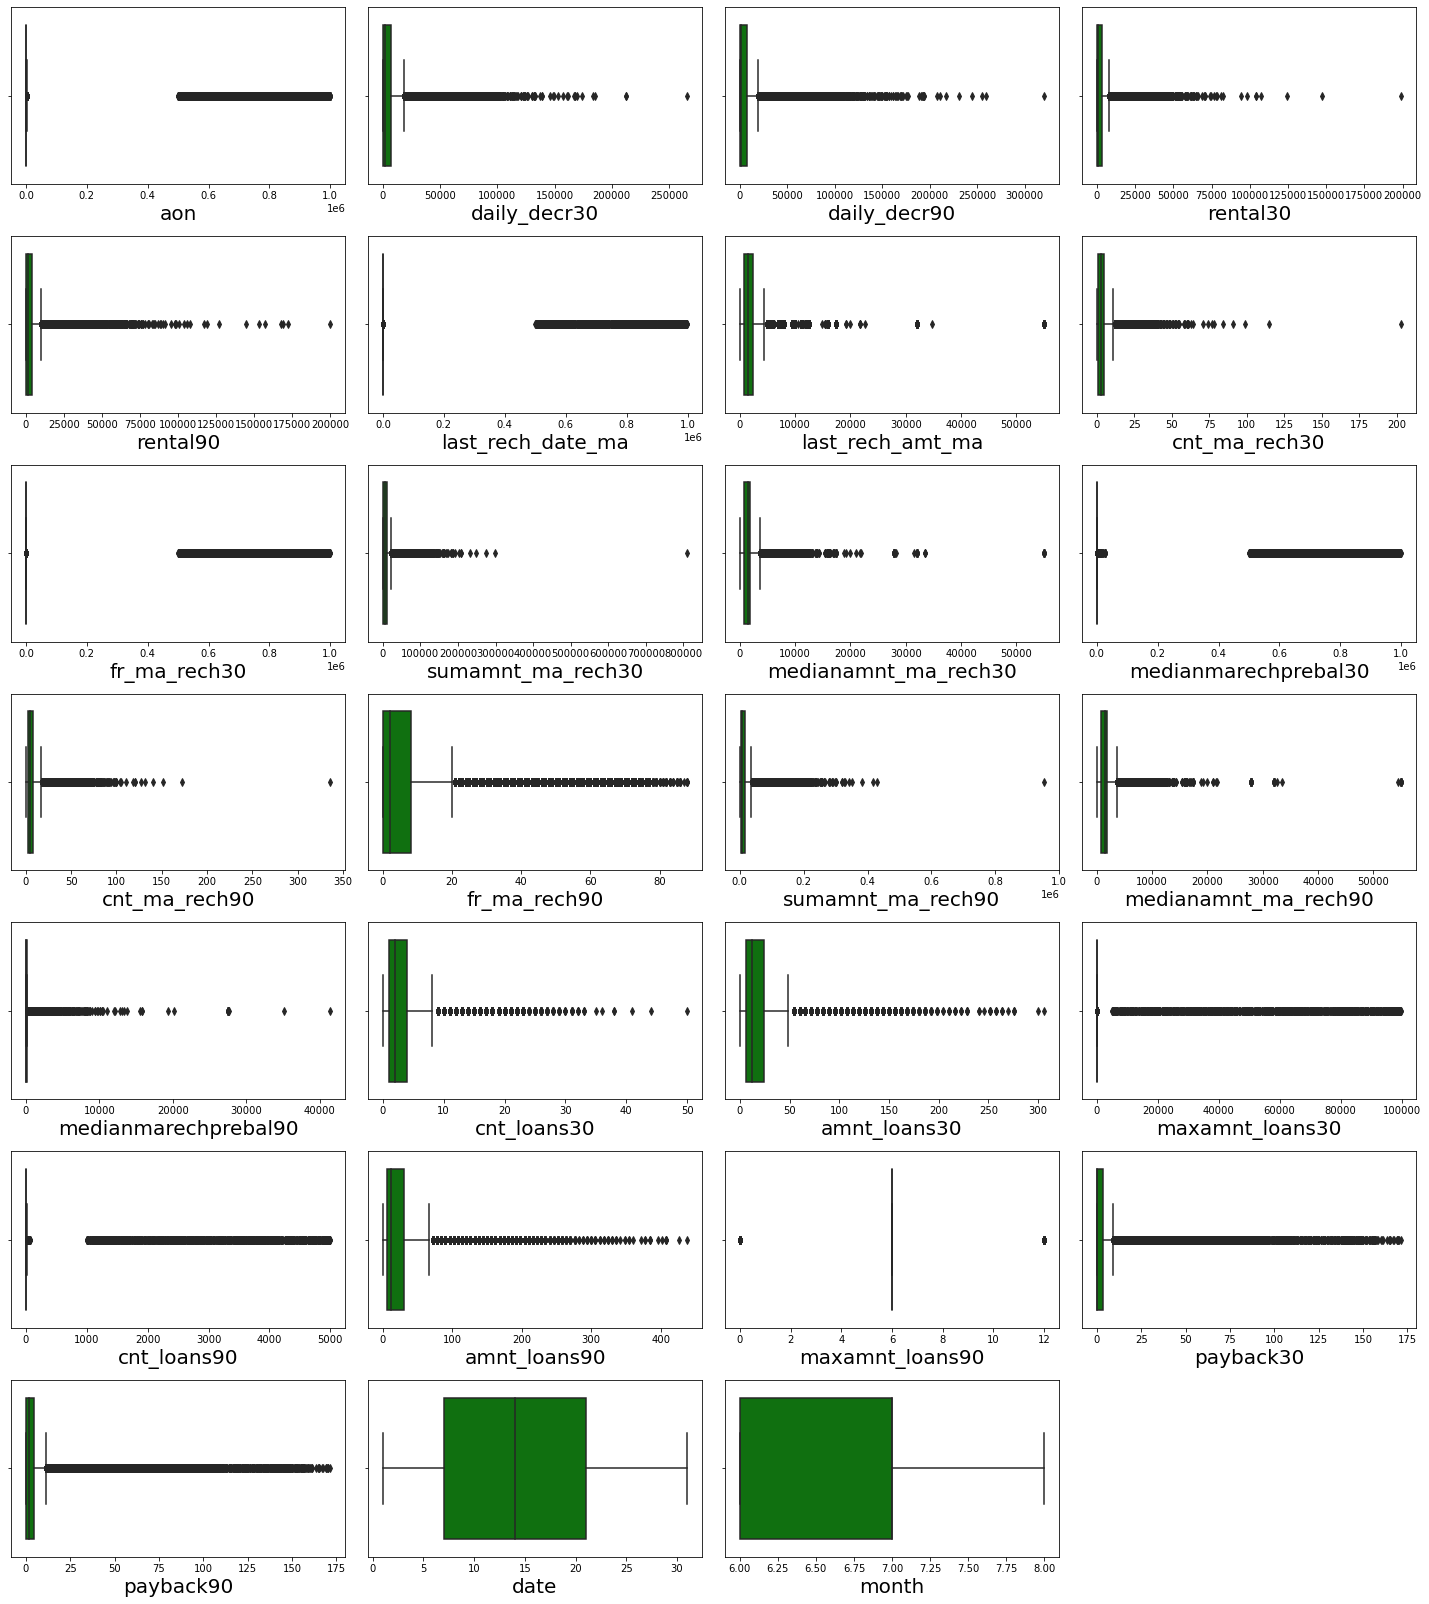

In [10]:
# We observed when we describe this dataset outliers are present, now we are going to deal with outliers 

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col1:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
outliers=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]

In [13]:
#handeling outliers

from scipy.stats import zscore
z=np.abs(zscore(outliers))
df1=df[(z<3).all(axis=1)]
df1.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,date,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,22,6


In [14]:
#Percentile
for colu in outliers:
    if df[colu].dtypes != 'object':
        percentile = df[colu].quantile([0.01,0.98]).values
        df[colu][df[colu]<=percentile[0]]=percentile[0]
        df[colu][df[colu]>=percentile[1]]=percentile[1]

In [15]:
col2=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

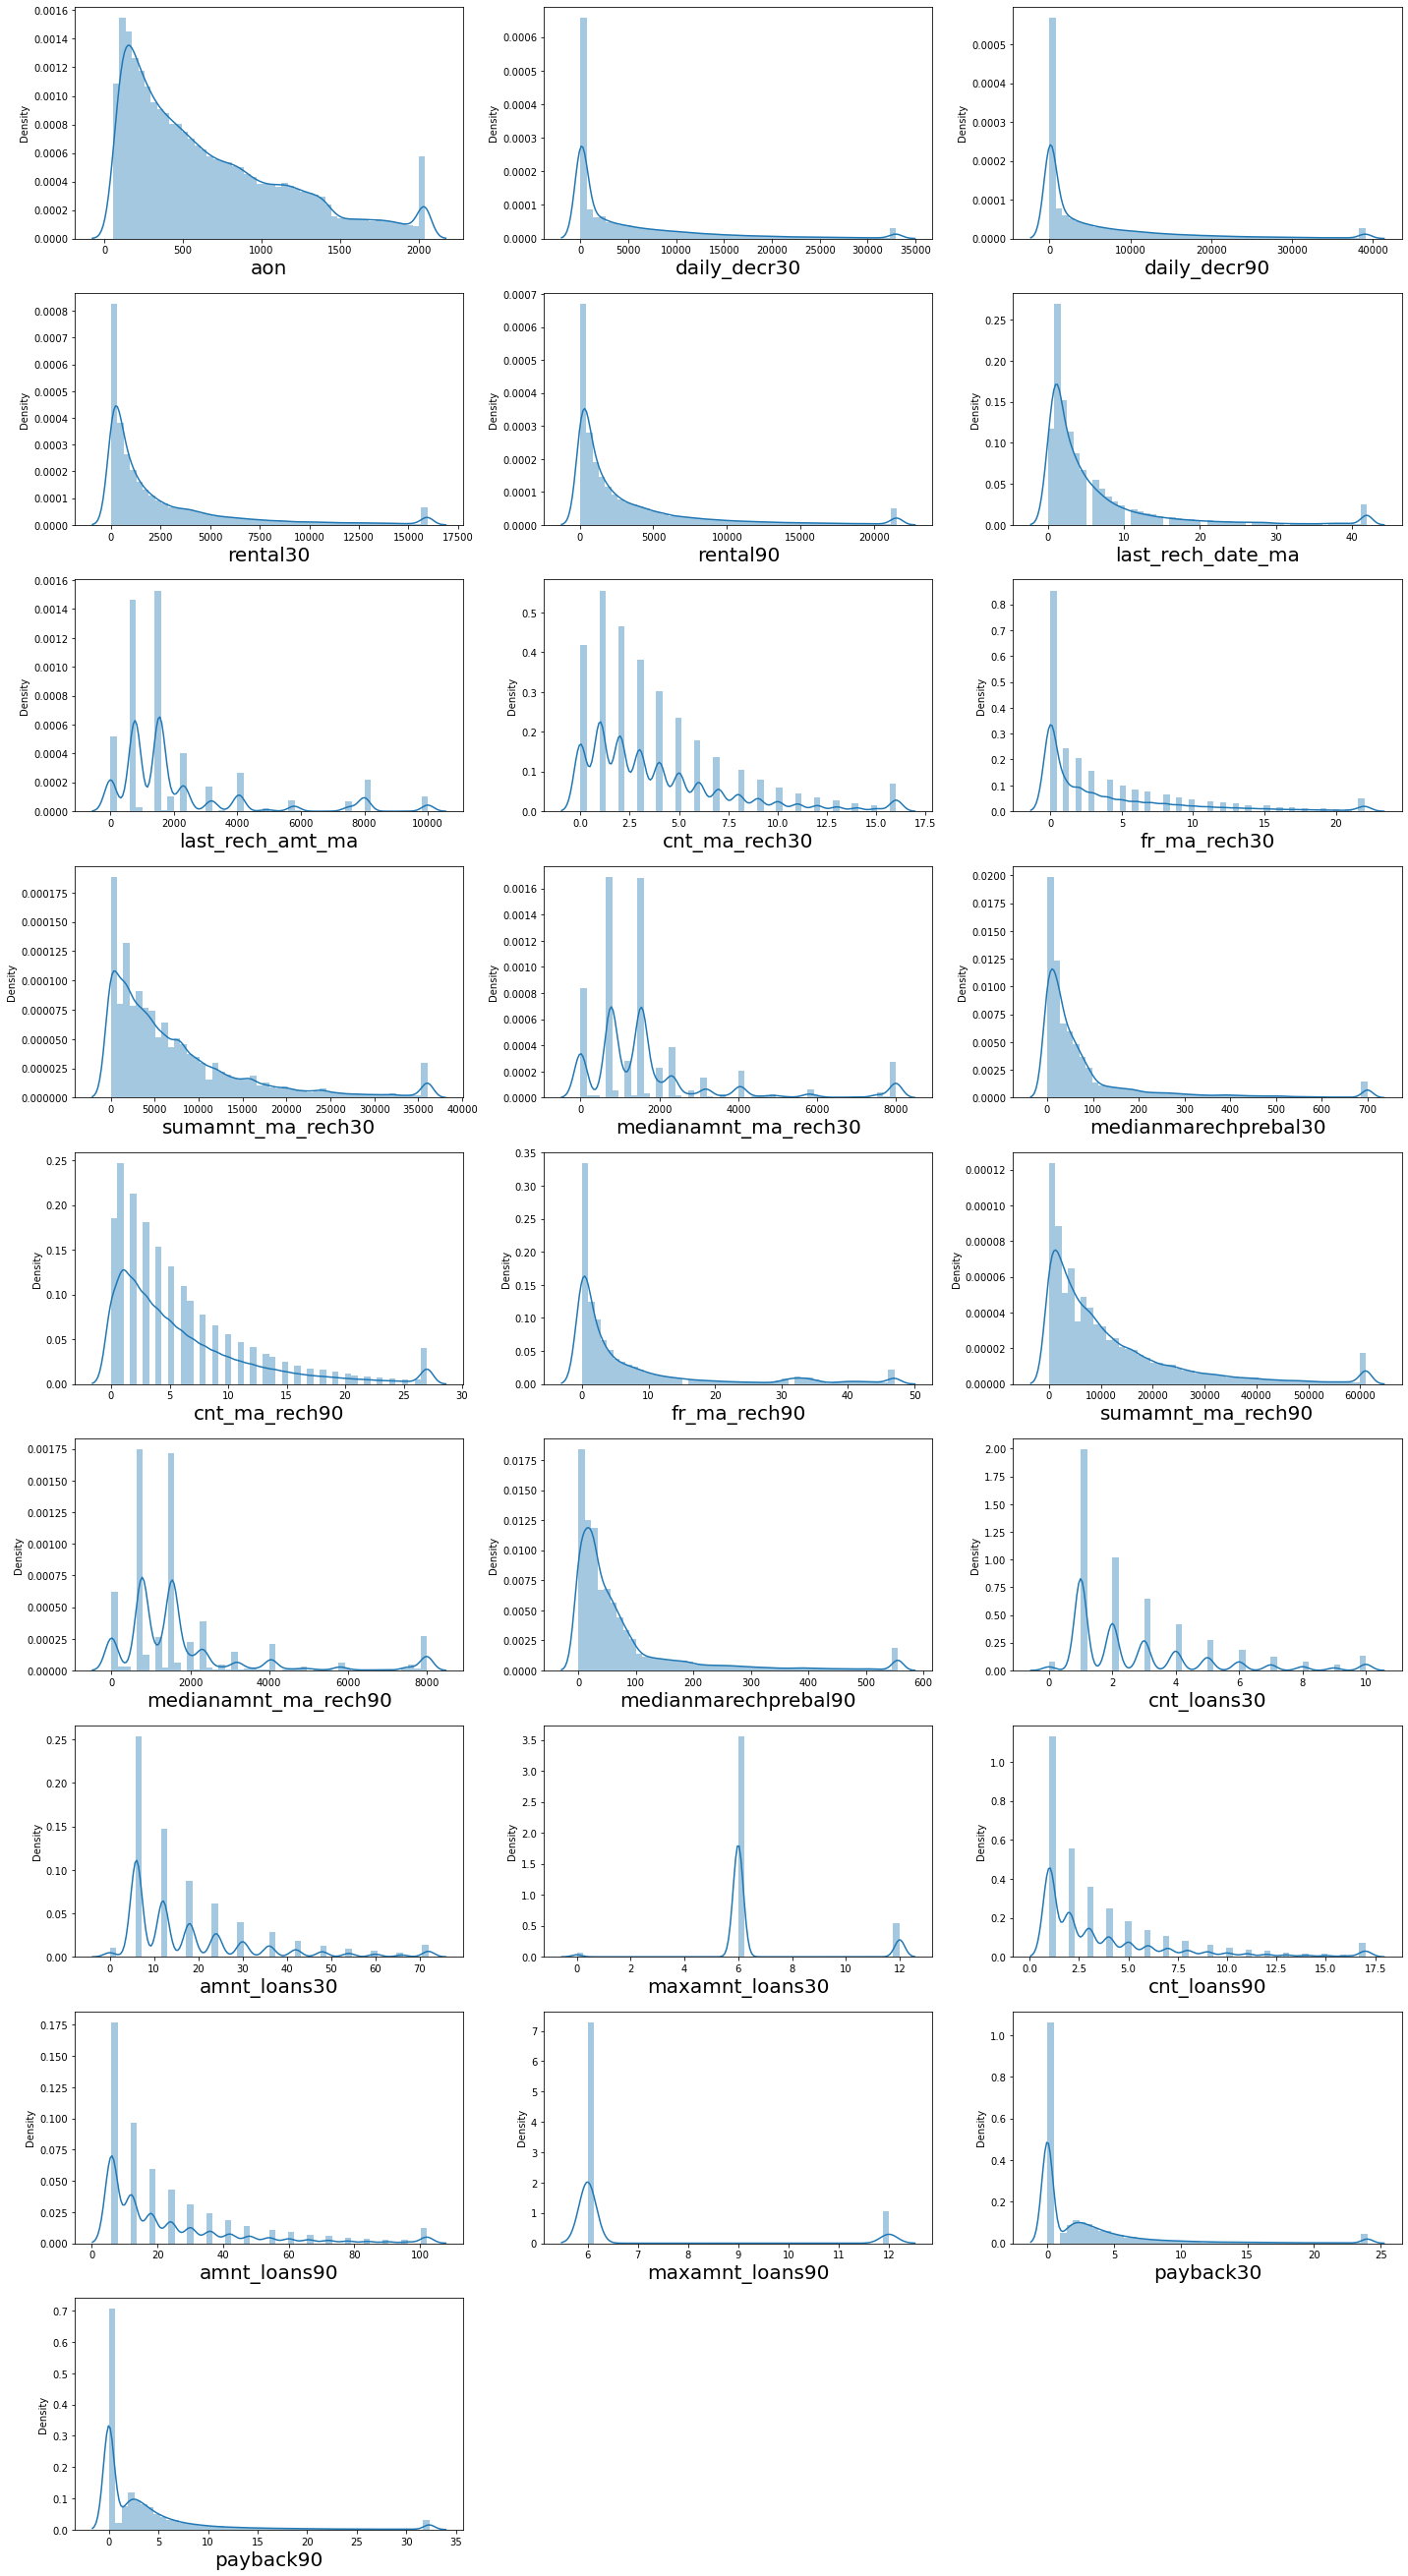

In [16]:
#Cheking the skewness
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[col2]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [17]:
#Removing skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [18]:
df[col2] = scaler.fit_transform(df[col2].values)

In [19]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,date,month
label,1.000000,0.096262,0.267074,0.269539,0.142217,0.156720,0.065769,0.261566,0.344117,0.241584,...,0.234590,0.233908,0.059640,0.287749,0.302702,0.099722,0.232640,0.240351,0.006828,0.154955
aon,0.096262,1.000000,0.115719,0.116328,0.083374,0.091225,0.062096,0.097955,0.037109,0.069592,...,0.073935,0.074587,0.029572,0.116080,0.118643,0.038824,0.081137,0.111312,0.016448,0.086131
daily_decr30,0.267074,0.115719,1.000000,0.998328,0.583838,0.640815,0.124667,0.376118,0.495416,0.295996,...,0.341656,0.394813,0.293096,0.517784,0.571142,0.403143,0.328777,0.404245,-0.009167,0.816994
daily_decr90,0.269539,0.116328,0.998328,1.000000,0.584060,0.645829,0.128715,0.375746,0.490856,0.295064,...,0.335046,0.388836,0.291623,0.518885,0.572559,0.406065,0.326096,0.404870,-0.016238,0.830247
rental30,0.142217,0.083374,0.583838,0.584060,1.000000,0.973267,0.054789,0.284288,0.454494,0.248020,...,0.311010,0.341524,0.207844,0.417470,0.447286,0.276136,0.307756,0.342924,0.101982,0.417778
rental90,0.156720,0.091225,0.640815,0.645829,0.973267,1.000000,0.088574,0.295280,0.445557,0.249849,...,0.294165,0.329387,0.212637,0.435248,0.468700,0.302374,0.304171,0.359452,0.084642,0.505501
last_rech_date_ma,0.065769,0.062096,0.124667,0.128715,0.054789,0.088574,1.000000,0.517312,-0.021157,0.057783,...,-0.106418,-0.107862,-0.026414,-0.032599,-0.028060,0.013781,-0.099600,-0.026865,0.031441,0.076522
last_rech_amt_ma,0.261566,0.097955,0.376118,0.375746,0.284288,0.295280,0.517312,1.000000,0.321220,0.271814,...,0.144866,0.164278,0.130888,0.211549,0.240275,0.183079,0.143458,0.180046,0.057765,0.154444
cnt_ma_rech30,0.344117,0.037109,0.495416,0.490856,0.454494,0.445557,-0.021157,0.321220,1.000000,0.418863,...,0.700619,0.697460,0.183508,0.706690,0.719248,0.195097,0.546511,0.488966,0.097636,0.192336
fr_ma_rech30,0.241584,0.069592,0.295996,0.295064,0.248020,0.249849,0.057783,0.271814,0.418863,1.000000,...,0.298337,0.283386,0.093824,0.350051,0.361688,0.102116,0.413672,0.392589,0.080685,0.131976


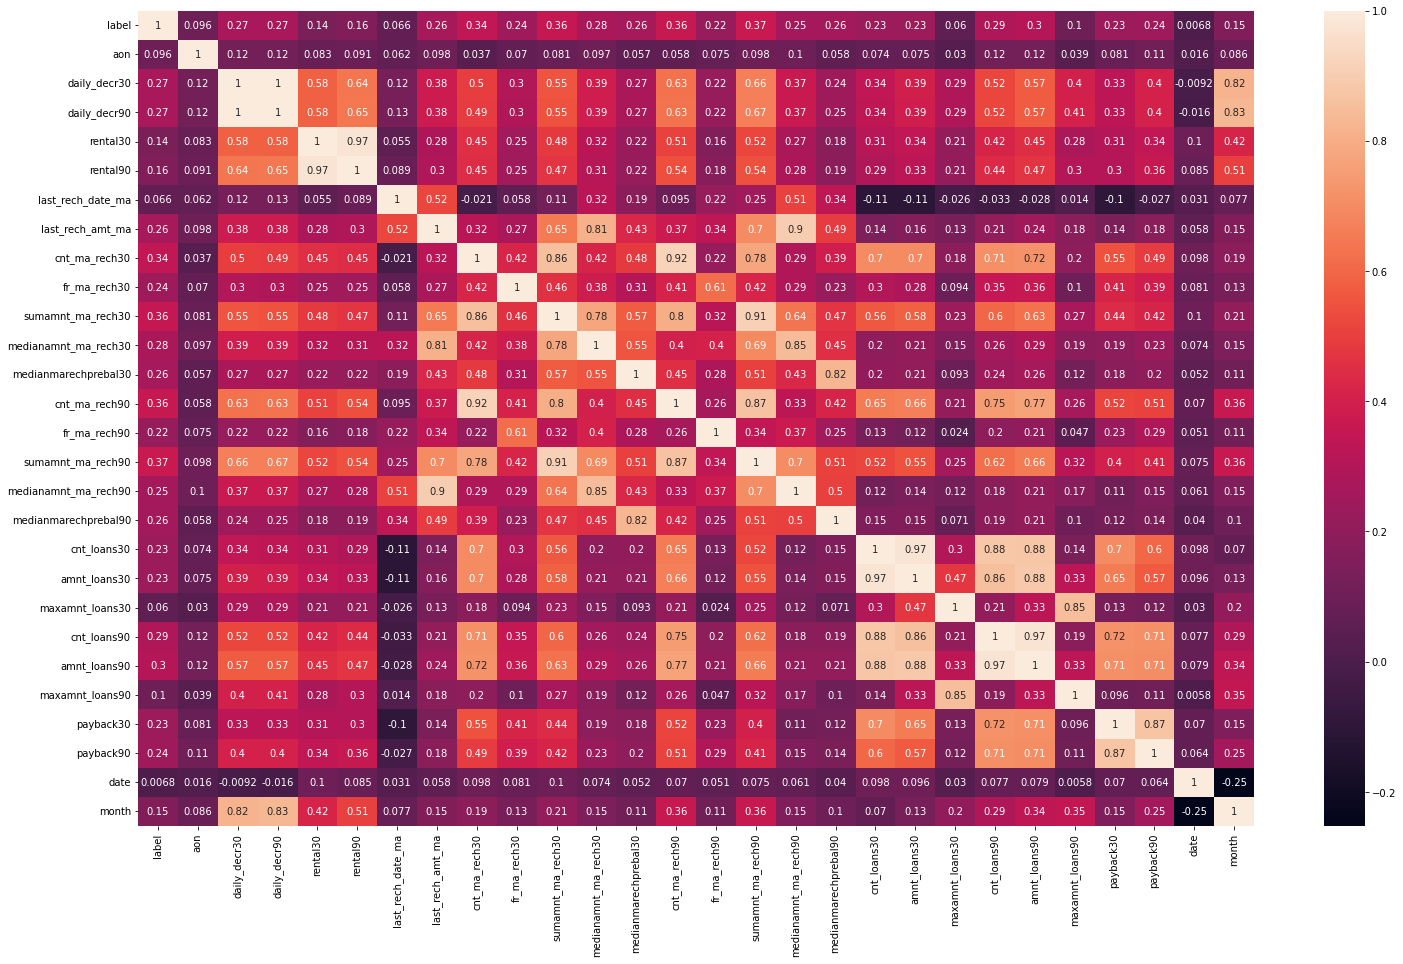

In [20]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Feature and target

In [22]:
x = df.drop("label",axis=1)
y = df["label"]

In [23]:
# Using StandardScaler to scale our data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [24]:
X.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,date,month
0,0.349423,0.667279,0.658325,0.329367,0.334578,0.378059,0.490126,0.369060,0.990908,0.435823,...,0.602059,0.576111,0.604177,0.318180,0.327421,0.0,1.000000,0.985619,0.633333,0.5
1,0.625639,0.849844,0.832349,0.704537,0.667040,0.865438,0.813902,0.230202,0.000000,0.541326,...,0.416448,0.576111,1.000000,0.000000,0.327421,1.0,0.000000,0.000000,0.300000,1.0
2,0.537613,0.574925,0.568986,0.490539,0.469676,0.463357,0.490126,0.230202,0.000000,0.342066,...,0.416448,0.431351,0.604177,0.000000,0.000000,0.0,0.000000,0.000000,0.600000,1.0
3,0.318535,0.194128,0.195701,0.298442,0.289468,0.995899,0.405284,0.000000,0.000000,0.000000,...,0.602059,0.576111,0.604177,0.318180,0.327421,0.0,0.000000,0.000000,0.166667,0.0
4,0.718974,0.350203,0.350126,0.517270,0.494502,0.526031,0.573384,0.718285,0.448841,0.822578,...,0.924472,0.866710,0.604177,0.794325,0.778518,0.0,0.579534,0.502197,0.700000,0.0


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

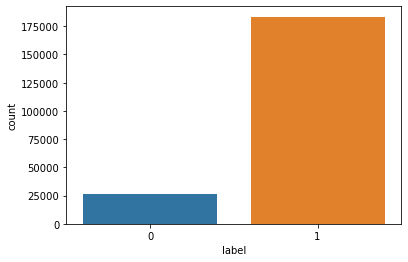

In [26]:
sns.countplot(y)

In [27]:
# We balenced our target column
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

<AxesSubplot:xlabel='label', ylabel='count'>

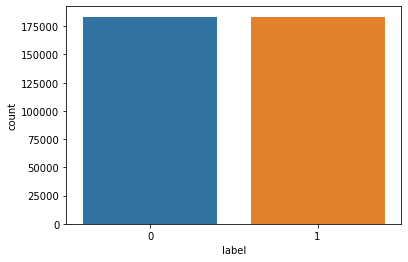

In [28]:
sns.countplot(y)

# ML Models

In [31]:
# important libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=54)

# We are wpoking on these ML Models
1)Logistic Regression
2)Random Forest Classifier
3)Decision Tree Classifier
4)Gradient Bossting Classifier
5)KNeighbors Classifier

# 1)Logistic Regression

In [33]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [34]:
lg_pred=lg.predict(X_test)
print("Predicted value:\n",lg_pred)
print("Accuracy Score:",accuracy_score(y_test,lg_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,lg_pred),'\n')
print("Classification Report:\n",classification_report(y_test,lg_pred))

Predicted value:
 [1 1 1 ... 0 0 1]
Accuracy Score: 0.7721676555302156 

Confusion Matrix:
 [[43180 11668]
 [13407 41804]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77     54848
           1       0.78      0.76      0.77     55211

    accuracy                           0.77    110059
   macro avg       0.77      0.77      0.77    110059
weighted avg       0.77      0.77      0.77    110059



# 2)Random Forest Classifier

In [35]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
rfc_pred=rfc.predict(X_test)
print("Predicted value:\n",rfc_pred)
print("Accuracy Score:",accuracy_score(y_test,rfc_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,rfc_pred),'\n')
print("Classification Report:\n",classification_report(y_test,rfc_pred))

Predicted value:
 [1 1 1 ... 0 0 1]
Accuracy Score: 0.952125678045412 

Confusion Matrix:
 [[52476  2372]
 [ 2897 52314]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     54848
           1       0.96      0.95      0.95     55211

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



# 3)Decision Tree Classifier

In [37]:
dr=DecisionTreeClassifier()
dr.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
dr_pred=dr.predict(X_test)
print("Predicted value:\n",dr_pred)
print("Accuracy Score:",accuracy_score(y_test,dr_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,dr_pred),'\n')
print("Classification Report:\n",classification_report(y_test,dr_pred))

Predicted value:
 [1 1 0 ... 0 0 1]
Accuracy Score: 0.9152454592536731 

Confusion Matrix:
 [[50545  4303]
 [ 5025 50186]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     54848
           1       0.92      0.91      0.91     55211

    accuracy                           0.92    110059
   macro avg       0.92      0.92      0.92    110059
weighted avg       0.92      0.92      0.92    110059



# 4)Gradient Bossting Classifier

In [39]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [40]:
gbc_pred=gbc.predict(X_test)
print("Predicted value:\n",gbc_pred)
print("Accuracy Score:",accuracy_score(y_test,gbc_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,gbc_pred),'\n')
print("Classification Report:\n",classification_report(y_test,gbc_pred))

Predicted value:
 [1 1 1 ... 0 0 1]
Accuracy Score: 0.901898072851834 

Confusion Matrix:
 [[50227  4621]
 [ 6176 49035]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     54848
           1       0.91      0.89      0.90     55211

    accuracy                           0.90    110059
   macro avg       0.90      0.90      0.90    110059
weighted avg       0.90      0.90      0.90    110059



# 5)KNeighbors Classifier

In [41]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
knn_pred=knn.predict(X_test)
print("Predicted value:\n",knn_pred)
print("Accuracy Score:",accuracy_score(y_test,knn_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred),'\n')
print("Classification Report:\n",classification_report(y_test,knn_pred))

Predicted value:
 [1 1 0 ... 0 0 1]
Accuracy Score: 0.9019525890658646 

Confusion Matrix:
 [[54376   472]
 [10319 44892]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     54848
           1       0.99      0.81      0.89     55211

    accuracy                           0.90    110059
   macro avg       0.92      0.90      0.90    110059
weighted avg       0.92      0.90      0.90    110059



In [44]:
#Cross Validation score
from sklearn.model_selection import cross_val_score

print("Cross Validation score for Logistic Regression:",cross_val_score(lg,X,y,cv=5).mean()*100)
print("Cross Validation score for Random Forest Classifier:",cross_val_score(rfc,X,y,cv=5).mean()*100)
print("Cross Validation score for Decision Tree Classifier:",cross_val_score(dr,X,y,cv=5).mean()*100)
print("Cross Validation score for Gradient Bossting Classifier:",cross_val_score(gbc,X,y,cv=5).mean()*100)
print("Cross Validation score for KNeighbors Classifier:",cross_val_score(knn,X,y,cv=5).mean()*100)

Cross Validation score for Logistic Regression: 77.2175922984819
Cross Validation score for Random Forest Classifier: 94.9981337985202
Cross Validation score for Decision Tree Classifier: 91.08903556587184
Cross Validation score for Gradient Bossting Classifier: 89.80516925204778
Cross Validation score for KNeighbors Classifier: 90.50814759328425


# Hyper parameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
params={'n_estimators':[50,60],
       'criterion':['gini','entropy'],
       'max_features':['auto','log2']}

In [47]:
grid_search=GridSearchCV(estimator=rfc,param_grid=params,cv=3,verbose=3)

In [48]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END criterion=gini, max_features=auto, n_estimators=50;, score=0.946 total time=  49.1s
[CV 2/3] END criterion=gini, max_features=auto, n_estimators=50;, score=0.945 total time=  48.4s
[CV 3/3] END criterion=gini, max_features=auto, n_estimators=50;, score=0.944 total time=  43.5s
[CV 1/3] END criterion=gini, max_features=auto, n_estimators=60;, score=0.946 total time=  55.5s
[CV 2/3] END criterion=gini, max_features=auto, n_estimators=60;, score=0.945 total time=  54.9s
[CV 3/3] END criterion=gini, max_features=auto, n_estimators=60;, score=0.945 total time= 1.0min
[CV 1/3] END criterion=gini, max_features=log2, n_estimators=50;, score=0.945 total time=  38.9s
[CV 2/3] END criterion=gini, max_features=log2, n_estimators=50;, score=0.944 total time=  41.1s
[CV 3/3] END criterion=gini, max_features=log2, n_estimators=50;, score=0.944 total time=  39.6s
[CV 1/3] END criterion=gini, max_features=log2, n_estimators=60;, s

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 60]},
             verbose=3)

In [49]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 60}

In [50]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=60)

In [51]:
grid_search.best_score_

0.9458651183981495

# Selecting Best Accuracy Score Model

In [54]:
best_model=RandomForestClassifier(criterion='gini',max_features='auto',n_estimators=60)

In [55]:
best_model.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', n_estimators=60)

In [57]:
best_model_pred=best_model.predict(X_test)
print("Predicted value:",best_model_pred)
print("Accuracy Score:",accuracy_score(y_test,best_model_pred),'\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,best_model_pred),'\n')
print("Classification Report:\n",classification_report(y_test,best_model_pred))

Predicted value: [1 1 1 ... 0 0 1]
Accuracy Score: 0.9523164847945194 

Confusion Matrix:
 [[52496  2352]
 [ 2896 52315]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     54848
           1       0.96      0.95      0.95     55211

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



# AUC-ROC Curve

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [59]:
fpr,tpr,threshold=roc_curve(y_test,best_model_pred)

In [61]:
print('False positive rate =',fpr)
print('True positive rate = ',tpr)
print('threshold = ',threshold)

False positive rate = [0.         0.04288215 1.        ]
True positive rate =  [0.         0.94754668 1.        ]
threshold =  [2 1 0]


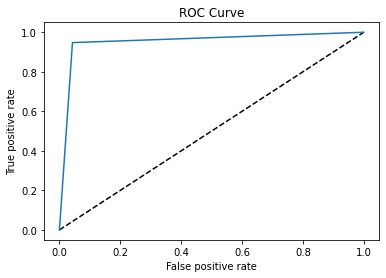

In [62]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

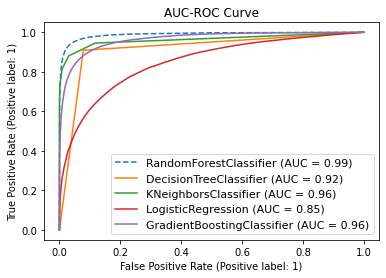

In [63]:
dist=plot_roc_curve(rfc,X_test,y_test,linestyle='--')
plot_roc_curve(dr,X_test,y_test,ax=dist.ax_)
plot_roc_curve(knn,X_test,y_test,ax=dist.ax_)
plot_roc_curve(lg,X_test,y_test,ax=dist.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=dist.ax_)
plt.title("AUC-ROC Curve")

plt.legend(prop={'size':11},loc='lower right')
plt.show()

The best model for Micro-Credit Defaulter is Random Forest Classifier with AUC=0.99

# Saving the Best Model

In [69]:
import pickle 

filename = 'Micro_Credit_Defaulter_ML.pkl'

pickle.dump(best_model, open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [70]:
loaded_model.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', n_estimators=60)

In [71]:
prediction=loaded_model.predict(X_test)
print("Predicted value:",prediction)
print("Accuracy Score:",accuracy_score(y_test,prediction),'\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction),'\n')
print("Classification Report:\n",classification_report(y_test,prediction))

Predicted value: [1 1 1 ... 0 0 1]
Accuracy Score: 0.9517440645471974 

Confusion Matrix:
 [[52503  2345]
 [ 2966 52245]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     54848
           1       0.96      0.95      0.95     55211

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



# Prediction

In [68]:
df=pd.DataFrame([loaded_model.predict(X_test)[:],y_test[:]],index=['Predicted','Actual'])
df

,0,1,2,3,4,5,6,7,8,9,...,110049,110050,110051,110052,110053,110054,110055,110056,110057,110058
Predicted,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
Actual,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
